<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-обзор-датасета" data-toc-modified-id="Загрузка-и-обзор-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и обзор датасета</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выделим-признаки-features,-цели-target,-поделим-датасет-на-обучающую,-валидационную-и-тестовую-выборки.-Категориальные-признаки-переведем-в-численные-через-dummy-признаки-предварительно." data-toc-modified-id="Выделим-признаки-features,-цели-target,-поделим-датасет-на-обучающую,-валидационную-и-тестовую-выборки.-Категориальные-признаки-переведем-в-численные-через-dummy-признаки-предварительно.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выделим признаки <code>features</code>, цели <code>target</code>, поделим датасет на обучающую, валидационную и тестовую выборки. Категориальные признаки переведем в численные через dummy-признаки предварительно.</a></span></li><li><span><a href="#Исследование-без-учета-дисбаланса" data-toc-modified-id="Исследование-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Проверка-баланса-классов-целевого-признака:" data-toc-modified-id="Проверка-баланса-классов-целевого-признака:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка баланса классов целевого признака:</a></span></li><li><span><a href="#Балансировка" data-toc-modified-id="Балансировка-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Балансировка</a></span></li><li><span><a href="#Проверка-значения-целевой-метрики-после-балансировки-классов:" data-toc-modified-id="Проверка-значения-целевой-метрики-после-балансировки-классов:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка значения целевой метрики после балансировки классов:</a></span></li></ul></li><li><span><a href="#Тестирование-модели-RF-после-балансировки-значений-датасета-на-тестовой-выборке:" data-toc-modified-id="Тестирование-модели-RF-после-балансировки-значений-датасета-на-тестовой-выборке:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели RF после балансировки значений датасета на тестовой выборке:</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Цель исследования: выбрать, обучить и исследовать модель, которая сможет спрогнозировать - уйдёт клиент из банка в ближайшее время или нет - со значением f1-меры не менее 0.59. Исследование проводится на датасете с историческими данными о поведении клиентов и расторжении договоров с банком. 

Обучение будет проведено на тренировочной выборке, проверено на валидационной. Итоговое исследование выбранной модели произведем на тестовой выборке. Дополнительно измерим показатель *AUC-ROC*, сравнивним её значение с *F1*-мерой.

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
* Целевой признак
* Exited — факт ухода клиента



Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

pd.options.mode.chained_assignment = None

### Загрузка и обзор датасета

In [2]:
data = pd.read_csv('Churn.csv')
display(data.head(15))
print(data.info(memory_usage='deep'))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB
None


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8215396790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8215396e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8215396430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f820d32e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f820d32e8b0>],
 'means': []}

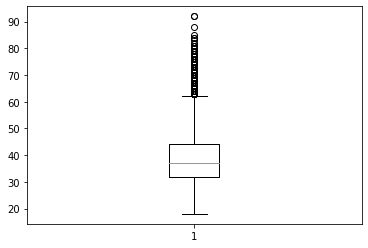

In [3]:
plt.boxplot(data['Age'])

Text(0.5, 0, 'чуваки')

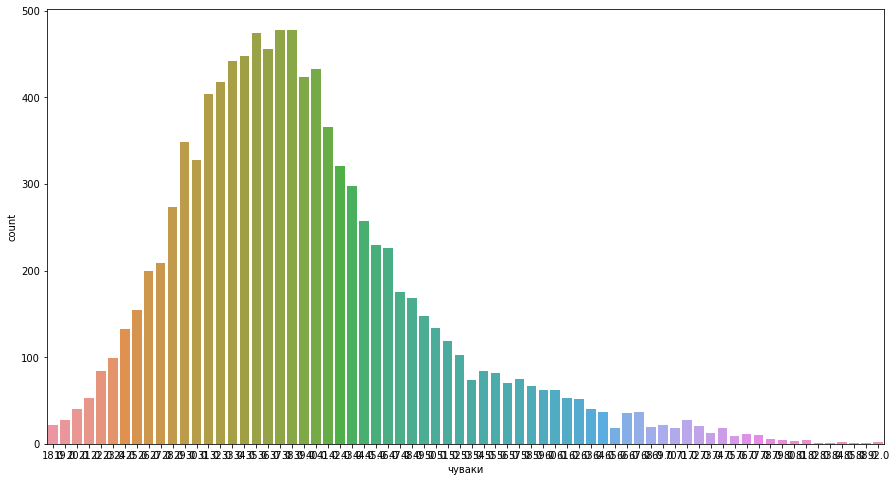

In [4]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2 })
plt.figure(figsize=(15,8))

sns.countplot(data=data, x=data['Age'].apply(np.median));
plt.xlabel('чуваки')



In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,2,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,2,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,2,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,2,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,2,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,2,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3.0,75075.31,2,1,0,92888.52,1


**Вывод:** Датасет имеет 9999 записей. Требуется изменить типы данных (`gender`, `tenure`, `numofproducts`, `hascrcard`, `isactivemember`) для экономии памяти. Пропуски присутствуют в столбце `Tenure`

### Предобработка данных

Сбросим индексы.
Отбросим столбцы, не имеющие значения для обучения модели - они создадут излишество при OHE, откорректируем наименования столбцов. Дубликаты в записях отсутствуют.

In [6]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1")

/tmp/ipykernel_79/2842615330.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"([A-Z])", r" \1")


In [7]:
data.columns

Index([' Row Number', ' Customer Id', ' Surname', ' Credit Score',
       ' Geography', ' Gender', ' Age', ' Tenure', ' Balance',
       ' Num Of Products', ' Has Cr Card', ' Is Active Member',
       ' Estimated Salary', ' Exited'],
      dtype='object')

In [8]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [9]:
data.columns

Index(['_row_number', '_customer_id', '_surname', '_credit_score',
       '_geography', '_gender', '_age', '_tenure', '_balance',
       '_num_of_products', '_has_cr_card', '_is_active_member',
       '_estimated_salary', '_exited'],
      dtype='object')

In [10]:
data.columns = data.columns.str[1:]

In [11]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [12]:
data

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,2,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,2,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,2,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,2,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,2,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,2,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
data.reset_index()
data = data.drop(['surname', 'row_number', 'customer_id'], axis=1)
data['geography'] = data['geography'].str.lower()

#check
print('Явные дубликаты:', data.duplicated().sum())

#data = data.rename(
#    columns={
#    'creditscore': 'credit_score',
#    'numofproducts': 'num_of_products',
#    'hascrcard': 'has_cr_card',
#    'isactivemember': 'is_active_member',
#    'estimatedsalary': 'estimated_salary',
#    }
#    )

Явные дубликаты: 0


In [14]:
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,france,2,42,2.0,0.00,1,1,1,101348.88,1
1,608,spain,2,41,1.0,83807.86,1,0,1,112542.58,0
2,502,france,2,42,8.0,159660.80,3,1,0,113931.57,1
3,699,france,2,39,1.0,0.00,2,0,0,93826.63,0
4,850,spain,2,43,2.0,125510.82,1,1,1,79084.10,0


Заполнение пропусков: сперва определим доли заполненных значений `tenure` в переменной `to_refill`. Далее - создаем список рандомных чисел из имеющихся в `tenure` и создаем список `to_refill_list` в аналогичных долях.

In [15]:
to_refill = data['tenure'].value_counts(normalize=True, ascending=True).sort_values()
#to_refill
to_refill_list = random.choices(
                                population=to_refill.index,
                                weights=to_refill,
                                k=909)
#display(to_refill_list.value_counts(normalize=True, ascending=True).sort_values())
#print(len(to_refill_list))

Присваиваем пропускам значения сгенерированного списка`to_refill_list`:

In [16]:
data.loc[data['tenure'].isna(), 'tenure'] = to_refill_list
print(data.isna().sum())

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


Корректировка типов данных:

In [17]:
data['geography'] = data['geography'].astype('category')
data['gender'] = data['gender'].astype('category')
data['age'] = data['age'].astype('uint16')
data['tenure'] = data['tenure'].astype('category')
data['num_of_products'] = data['num_of_products'].astype('category')
data['has_cr_card'] = data['has_cr_card'].astype('category')
data['is_active_member'] = data['is_active_member'].astype('category')

display(data.head())
data.info(memory_usage='deep')

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,france,2,42,2.0,0.00,1,1,1,101348.88,1
1,608,spain,2,41,1.0,83807.86,1,0,1,112542.58,0
2,502,france,2,42,8.0,159660.80,3,1,0,113931.57,1
3,699,france,2,39,1.0,0.00,2,0,0,93826.63,0
4,850,spain,2,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   geography         10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  uint16  
 4   tenure            10000 non-null  category
 5   balance           10000 non-null  float64 
 6   num_of_products   10000 non-null  category
 7   has_cr_card       10000 non-null  category
 8   is_active_member  10000 non-null  category
 9   estimated_salary  10000 non-null  float64 
 10  exited            10000 non-null  int64   
dtypes: category(6), float64(2), int64(2), uint16(1)
memory usage: 392.0 KB


In [18]:
#check
data.apply (['count', 'min', 'max']).style.format("{:,.2f}")

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
min,350.00,nan,nan,18.00,nan,0.00,nan,nan,nan,11.58,0.00
max,850.00,nan,nan,92.00,nan,"250,898.09",nan,nan,nan,"199,992.48",1.00


In [19]:
for i in data.columns:
    print(data[i].unique())

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


**Вывод:** 
1. Совершена предобработка данных: заполнены пропуски, откорректированы типы данных, отброшены нерелевантные столбцы. 
2. Пропуски в столбце `tenure` заполнены рандомно из диапазона существуюших значений в соответствующих пропорциях
3. Объем требуемой памяти сократился с 2.6Мб до 400Кб.

## Исследование задачи

### Выделим признаки `features`, цели `target`, поделим датасет на обучающую, валидационную и тестовую выборки. Категориальные признаки переведем в численные через dummy-признаки предварительно.

In [20]:
data_ohe = pd.get_dummies(data, drop_first=True)
#check
display(data_ohe.head(10))

,credit_score,age,balance,estimated_salary,exited,geography_germany,geography_spain,gender_2,tenure_1.0,tenure_2.0,...,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0,num_of_products_2,num_of_products_3,num_of_products_4,has_cr_card_1,is_active_member_1
0,619,42,0.00,101348.88,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,608,41,83807.86,112542.58,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,502,42,159660.80,113931.57,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,699,39,0.00,93826.63,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,850,43,125510.82,79084.10,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
5,645,44,113755.78,149756.71,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6,822,50,0.00,10062.80,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
7,376,29,115046.74,119346.88,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
8,501,44,142051.07,74940.50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,684,27,134603.88,71725.73,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [21]:
features = data_ohe.drop('exited', axis=1 )
target = data_ohe['exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=433, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=433, stratify=target_valid)

In [22]:
#check
print('Размер тренировочной выборки признаков:', features_train.shape)
print('Размер проверочной выборки признаков:', features_valid.shape)
print('Размер тестовой выборки цпризнаков:', features_test.shape)

Размер тренировочной выборки признаков: (6000, 22)
Размер проверочной выборки признаков: (2000, 22)
Размер тестовой выборки цпризнаков: (2000, 22)


In [23]:
#check
print('Размер тренировочной выборки целевого значения:', target_train.shape)
print('Размер проверочной выборки целевого значения:', target_valid.shape)
print('Размер тестовой выборки целевого значения:', target_test.shape)

Размер тренировочной выборки целевого значения: (6000,)
Размер проверочной выборки целевого значения: (2000,)
Размер тестовой выборки целевого значения: (2000,)


In [24]:
numeric = ['balance', 'estimated_salary', 'age', 'credit_score']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Исследование без учета дисбаланса

Исследуем логистическую регрессию:

In [25]:
%%time
model_lr = LogisticRegression(solver='liblinear', random_state=433)
model_lr.fit(features_train, target_train)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)
precision_lr = precision_score(target_valid, predicted_lr)
recall_lr = recall_score(target_valid, predicted_lr)
auc_roc_lr = roc_auc_score(target_valid, predicted_lr)

CPU times: user 41.9 ms, sys: 14.2 ms, total: 56.1 ms
Wall time: 54.9 ms


In [26]:
print('Несбалансированная LR, f1-мера:', f1_lr)
print('Несбалансированная LR, точность:', precision_lr)
print('Несбалансированная LR, полнота:', recall_lr)
print('AUC-ROC LR:', auc_roc_lr)

Несбалансированная LR, f1-мера: 0.48287112561174544
Несбалансированная LR, точность: 0.7219512195121951
Несбалансированная LR, полнота: 0.3627450980392157
AUC-ROC LR: 0.6634705389693566


Исследуем Случайный лес. Цикл делаю только для max_depth, n-estim перебрал вручную с 20 до 100

In [27]:
%%time
f1_rf1_best= 0
best_depth = None
for depth in range(1,15):
    model_rf1 = RandomForestClassifier(n_estimators=80, random_state=433, max_depth=depth)
    model_rf1.fit(features_train, target_train)
    predicted_rf1 = model_rf1.predict(features_valid)
    f1_rf1 = f1_score(target_valid, predicted_rf1)
    precision_rf1 = precision_score(target_valid, predicted_rf1)
    recall_rf1 = recall_score(target_valid, predicted_rf1)
    roc_auc_rf1 = roc_auc_score(target_valid, predicted_rf1)
    if f1_rf1 > f1_rf1_best:
        f1_rf1_best = f1_rf1
        best_depth = depth

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: user 4.57 s, sys: 14.8 ms, total: 4.59 s
Wall time: 4.61 s


In [28]:
print('Несбалансированный RF, глубина:', best_depth)
print('Несбалансированный RF, f1-мера:', f1_rf1)
print('Несбалансированный RF, точность:', precision_rf1)
print('Несбалансированный RF, полнота:', recall_rf1)
print('Несбалансированный RF, AUC-ROC :', roc_auc_rf1)

Несбалансированный RF, глубина: 13
Несбалансированный RF, f1-мера: 0.5520504731861198
Несбалансированный RF, точность: 0.7743362831858407
Несбалансированный RF, полнота: 0.42892156862745096
Несбалансированный RF, AUC-ROC : 0.6984431963740271


**Вывод:** Обе модели показали низкие результаты при построении моделей без учета дисбаланса. LR имеет низкую f1-меру 0.48 за счет низкой полноты (0.36!) определения целевого признака. RF имеет низкую f1-меру 0.56 также за счет низкого значения полноты: модель определяет "1" с высокой точностью, но далеко не каждую. Проверим величину разбаланса целевых значений.

## Борьба с дисбалансом

### Проверка баланса классов целевого признака:

0    0.7963
1    0.2037
Name: exited, dtype: float64


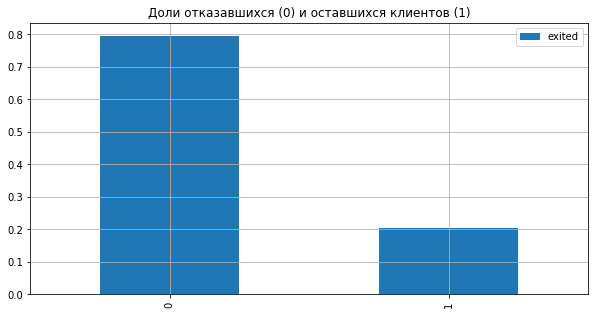

In [29]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(
    kind='bar', figsize=(10,5), grid=True, title='Доли отказавшихся (0) и оставшихся клиентов (1)', legend=True, );

**Вывод:** Между значениями целевого признака наблюдается явный дисбаланс в отношении 1:4. Требуется балансировка

### Балансировка

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=433)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)
features_upsampled.shape

(10888, 22)

### Проверка значения целевой метрики после балансировки классов:

Проверим модель Логистической регресии при балансировке классов встроенным методом:

In [31]:
model_lr_balanced_1 = LogisticRegression(random_state = 433, solver = 'liblinear', class_weight='balanced')
model_lr_balanced_1.fit(features_train, target_train)

predicted_lr_balanced_1 = model_lr_balanced_1.predict(features_valid)

print("F1-мера для логистической регрессии после балансировки встроенным методом:", \
      f1_score(target_valid, predicted_lr_balanced_1))

F1-мера для логистической регрессии после балансировки встроенным методом: 0.5416666666666667


Проверим модель Логистической регресии после балансировки классов:

In [32]:
model_lr_balanced_2 = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight='balanced')
model_lr_balanced_2.fit(features_upsampled, target_upsampled)

predicted_lr_balanced_2 = model_lr_balanced_2.predict(features_valid)

print("F1-мера для логистической регрессии после балансировки:", f1_score(target_valid, predicted_lr_balanced_2))

F1-мера для логистической регрессии после балансировки: 0.540796963946869


In [33]:
model_rf_2 = RandomForestClassifier(n_estimators=60, random_state=433, max_depth=14)
model_rf_2.fit(features_upsampled, target_upsampled)
predicted_rf_balanced = model_rf_2.predict(features_valid)

precision_rf2 = precision_score(target_valid, predicted_rf_balanced)
recall_rf2 = recall_score(target_valid, predicted_rf_balanced)
roc_auc_rf2 = roc_auc_score(target_valid, predicted_rf_balanced)

print("F1-мера для случайного леса после балансировки:", f1_score(target_valid, predicted_rf_balanced))

F1-мера для случайного леса после балансировки: 0.5951557093425606


**Вывод:** Модель линейной регрессии после балансировки классов обоими методами показала низкое значение F1-меры < 0.59. Для дальнейшего исследования выбираем модель RF со значением f1-меры 0.61

## Тестирование модели RF после балансировки значений датасета на тестовой выборке:

Исследуем влияние параметры определения границы присвоения целевого признака `threshold`:

Для тестирования модели RF с выбранными параметрами объединим выборки, предварительно проведя балансировку валидационной выборки:

In [34]:
features_upsampled_valid, target_upsampled_valid = upsample(features_valid, target_valid, 5)

features_concat = pd.concat([features_upsampled, features_upsampled_valid])
target_concat = pd.concat([target_upsampled, target_upsampled_valid])

#check
print(features_concat.shape)
print(target_concat.shape)

(14520, 22)
(14520,)


Обучим модель на валидационной + тренировочной выборке (для большего числа примеров). 

In [35]:
model_rf_concat = RandomForestClassifier(n_estimators=80, random_state=433, max_depth=14)
model_rf_concat.fit(features_concat, target_concat)
predicted_rf_concat = model_rf_concat.predict(features_test)

f1_concat =  f1_score(target_test, predicted_rf_concat)
roc_auc_concat =   roc_auc_score(target_test, predicted_rf_concat)

In [36]:
print(f1_concat)
print(roc_auc_concat)

0.6195899772209567
0.7716915683017378


Проверим влияние смещения порога приняния решения:

In [37]:
probabilities = model_rf_concat.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

for threshold in np.arange(0.2, 0.8, 0.04):
    predicted_rf_concat_2 = probabilities_one > threshold
    f1_concat_2 = f1_score(target_test, predicted_rf_concat_2)
    precision_concat_2 = precision_score(target_test, predicted_rf_concat_2)
    recall_concat_2 = recall_score(target_test, predicted_rf_concat_2)
    print("F1 = {:.2f} | Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        f1_concat_2, threshold, precision_concat_2, recall_concat_2))

F1 = 0.47 | Порог = 0.20 | Точность = 0.311, Полнота = 0.953
F1 = 0.50 | Порог = 0.24 | Точность = 0.341, Полнота = 0.931
F1 = 0.53 | Порог = 0.28 | Точность = 0.373, Полнота = 0.887
F1 = 0.56 | Порог = 0.32 | Точность = 0.410, Полнота = 0.860
F1 = 0.58 | Порог = 0.36 | Точность = 0.448, Полнота = 0.811
F1 = 0.60 | Порог = 0.40 | Точность = 0.490, Полнота = 0.769
F1 = 0.60 | Порог = 0.44 | Точность = 0.520, Полнота = 0.715
F1 = 0.62 | Порог = 0.48 | Точность = 0.560, Полнота = 0.688
F1 = 0.61 | Порог = 0.52 | Точность = 0.582, Полнота = 0.651
F1 = 0.61 | Порог = 0.56 | Точность = 0.606, Полнота = 0.609
F1 = 0.60 | Порог = 0.60 | Точность = 0.638, Полнота = 0.563
F1 = 0.59 | Порог = 0.64 | Точность = 0.669, Полнота = 0.526
F1 = 0.57 | Порог = 0.68 | Точность = 0.703, Полнота = 0.477
F1 = 0.53 | Порог = 0.72 | Точность = 0.748, Полнота = 0.415
F1 = 0.49 | Порог = 0.76 | Точность = 0.799, Полнота = 0.351
F1 = 0.43 | Порог = 0.80 | Точность = 0.853, Полнота = 0.285


Построим график зависимости точности `precision` и полноты `recall` от смещения границы `threshold`:

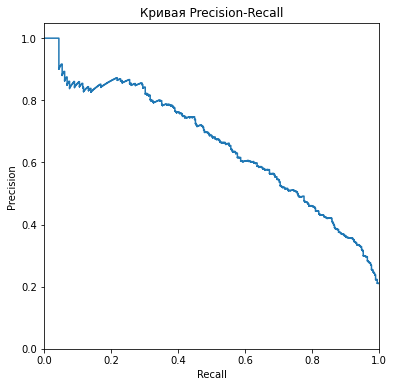

In [38]:
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

0.863519914367372


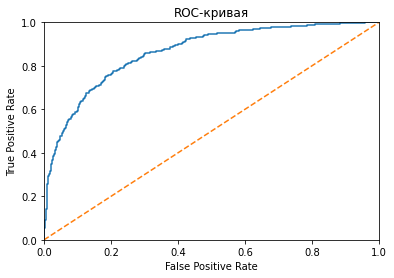

In [39]:
auc_roc = roc_auc_score(target_test, probabilities_one)
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr);
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--');

In [40]:
#проверка адекватности модели
target_pred_constant = [1 for i in range(len(target))]
target_pred_constant = pd.Series(target_pred_constant)

print(f1_score(target, target_pred_constant))

0.3384564260197724


**Вывод:** 
1. В ходе исследования произведена предобработка датасета. В результате предобработки заполнены пропущенные значения столбца `tenure`, сокращен объем использованной памяти с 2.6Mb до 0.4Mb.
2. Для исследования выбрана модель RF в связи с более высоким показателем значения f1-меры после балансировки целевого значения `target`. После балансировки, подбора параметров RF f1-меры доведена до значения 0.61. Сдвиг границы принятия решения `threshold` о присвоении класса 1 до значения 0.48 позволяет поднять значение f1-меры до значения 0.62
3. ROC-кривая находятся значительно выше прямой случайно модели: модель высокого качества с хорошим предсказанием TPR при низком значении FPR.
4. Кривая precision_recall модели RF находится высоко в верхней части графика, что говорит о высокой точности построенной модели.
5. Модель прошла проверку на адекватность: ее показатель f1-мера превышает примитивную модель.